In [34]:
import scipy
import matplotlib.pyplot as plt
import numpy as np
import math

# Poisson probability with the `scipy` library

The following lines of code show the `scipy` implementation on how to compute the Poisson probability $P(x=k|\lambda)$ of observing $x=k$ events when $\lambda$ are expected:

$$
P(x=k|\lambda)=\frac{\lambda^k e^{-\lambda}}{k!}
$$

In [35]:
k = 5
_lambda = 4
scipy.stats.poisson.pmf(k,_lambda)

0.1562934518505317

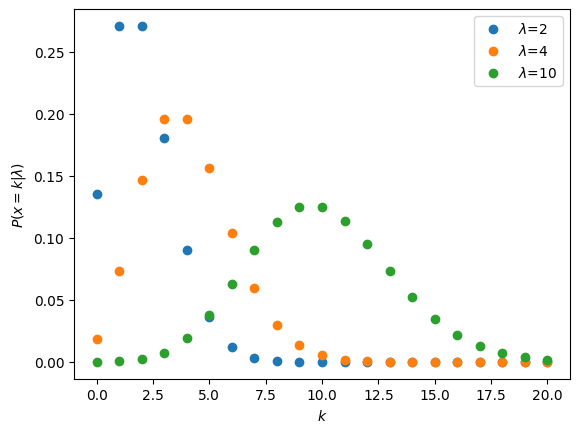

In [36]:
k=np.arange(0,21,1)

for _lambda in [2,4,10]:
  poisson_prob = scipy.stats.poisson.pmf(k,_lambda)
  plt.plot(k,poisson_prob,'o',label=f'$\lambda$={_lambda}')

plt.xlabel('$k$')
plt.ylabel('$P(x=k|\lambda)$')
plt.legend()
plt.show()

# Preamble

Consider a HEP experiment measuring an observable distributed in a 3-bin histogram.

Monte-Carlo methods were used to simulate this observable for signal and background processes and theory was used to predict the total number of events expected for both, yielding:

*   Expected signal: $S_i=\{34,67,42\}$
*   Expected background: $B_i=\{404,376,198\}$

The real data measurement was:

*   Real data measurement: $N_i=\{489,541,302\}$

# Exercise 1: Likelihood model

Consider the likelihood model for the statistical analysis of the experiment above, consisting of:

- A three-bin distribution of the observations
- Two expected samples: a **signal sample** and a **background sample**
- A normalization scaling factor $\mu$, the **signal strength**, for the signal sample.

The only parameter of interest in this likelihood model is $\mu$ and there are no additional nuisance parameters.

## 1a) Likelihood function

Define a python function based on `scipy` to compute the likelihood model described above.


In [37]:
# The likelihood function is a product of the probability of observing N events for a Poisson distribution
# with expected value given by the signal multiplied by a normalization factor (μ) plus background (there
# are no additional nuisance parameters - no need to include the normalization factor for the background).
import scipy
import matplotlib.pyplot as plt
import numpy as np
import math

def likelihood(Sig,Backg,mu,data):
  likelihoodresult = 1
  for i in range(len(data)):
    expected = Sig[i]*mu + Backg[i]
    likelihoodresult = likelihoodresult*scipy.stats.poisson.pmf(N[i],expected)
  return likelihoodresult

## 1b) Likelihood value for the observations
Use the function defined in line 1a) to calculate the likelihood for the observations described in the preamble, given the theoretical expectations for the signal and the background also described there (i.e. assuming that the normalisation of the simulation is correct).


In [38]:
# In this exercise, since we assume the normalisation of the simulation is correct, μ = 1. The simulation
# values (signal and background) and the real measurement data are in the preamble.
Signal = np.array([34,67,42])
Background = np.array([404,376,198])
N = np.array([489,541,302])
normfactor = 1
val=likelihood(Signal,Background,normfactor,N)
print("Assuming the normalisation of the simulation is correct, the likelihood is: {:.3e}.".format(val))

Assuming the normalisation of the simulation is correct, the likelihood is: 1.006e-14.


# Exercise 2: Best-fit signal strength $\hat{\mu}$

Consider the experiment and results described in the preamble.

## 2a) $\hat{\mu}>1$  or  $\hat{\mu}<1$ ?

Qualitatively, do you expect the best-fit value $\hat{\mu}$ to be larger or smaller than 1? Justify your answer.

**Your answer:** Firstly, we can recall that N = μ*Signal + Background, where N is the measured data. As such, for the three bins, we can compute for each the μ value, i.e., μ = (N - Background)/Signal, which are 2.50, 2.46 and 2.48, respectively. As such, we can expect that μ is greater than 1.

## 2b) Log-likelihood as a function of $\mu$
Draw the log-likelihood as a function of the parameter $\mu$.


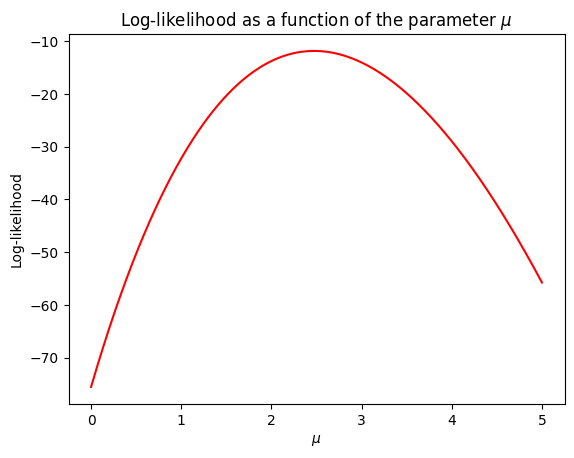

In [39]:
# We can use the function defined in 1.a) to define the one asked in this exercise and then we just plot it.
# For the next exercise, we shall need the log-likelihood points; thus, when I computed them, I stored them
# in an array, in order to be more efficient.
# I proposed values of μ between 0 and 5 separated by a step of 0.001.
def loglikelihood(mu):
  arg = likelihood(Signal, Background, mu, N)
  value = np.log(arg)
  return value
mus = np.arange(0, 5, 0.001)
loglikelihoodvalue = np.zeros(len(mus))
for i in range(len(mus)):
  loglikelihoodvalue[i] = loglikelihood(mus[i])
plt.plot(mus, loglikelihoodvalue, color='red')
plt.xlabel("$\mu$")
plt.ylabel("Log-likelihood")
plt.title("Log-likelihood as a function of the parameter $\mu$")
plt.show()

## 2c) Best-fit signal strength $\hat{\mu}$

Find the approximate best-fit value of $\hat{\mu}$.

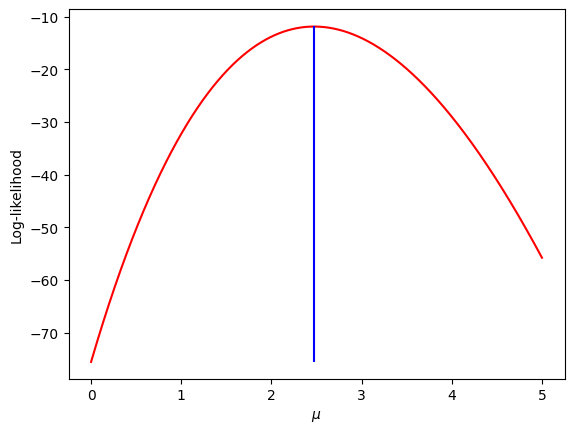

The best-fit value of μ-hat is: 2.47.


In [40]:
# We must find the value of μ that maximizes the log-likelihood function. As such, we find the maximum
# value of the array that contains the log-likelihood points and then find the μ that leads to that value.
maxlogindex = loglikelihoodvalue.argmax()
mu_hat = mus[maxlogindex]
plt.plot(mus, loglikelihoodvalue, color='red')
plt.vlines(mu_hat,loglikelihoodvalue.min(), loglikelihoodvalue.max()*.99, color = 'blue')
plt.xlabel("$\mu$")
plt.ylabel("Log-likelihood")
plt.show()
print("The best-fit value of μ-hat is: {:.2f}.".format(mu_hat))

## 2d) Uncertainty on $\hat{\mu}$

Find the approximate value for the uncertainty on $\hat{\mu}$.

In [41]:
# Let us use the "one-sigma" uncertainty.
# I assumed a gaussian likelihood, hence I only looked on one side.
# For large samples, the likelihood is ~ a Gaussian (Central Limit Theorem).

halflog = loglikelihood(mu_hat) - 1/2

index_mu_uncertainty = np.argmin(np.abs(np.array(loglikelihoodvalue)-halflog))

uncertainty = np.abs(mu_hat-mus[index_mu_uncertainty])

print("The interval of uncertainty on μ is given by: {:.2f} ± {:.2f}.".format(mu_hat, uncertainty))

The interval of uncertainty on μ is given by: 2.47 ± 0.24.


# Exercise 3: Significance calculation

Assuming the expression for a counting experiment, calculate the expected and observed signal significance taking into account the total number of signal, background or observed events (as needed).

## 3a) Expected significance


In [42]:
# Since it is a counting experiment, we can use the formula S/sqrt[S+B], where S is the expected/observed
# signal and B is the expected/observed background for the expected/observed significance.

expectedtotalsignal=Signal.sum()
expectedtotalbackground = Background.sum()
expectedsignificance = expectedtotalsignal/np.sqrt(expectedtotalsignal + expectedtotalbackground)
print("Expected significance:{:.2f}.".format(expectedsignificance))

Expected significance:4.27.


## 3b) Observed significance

In [43]:
# For the observed significance, we use mu_hat (best-fit signal strength), instead of mu = 1 (expected
# significance.

observedsignificance = mu_hat*expectedtotalsignal/np.sqrt(mu_hat*expectedtotalsignal+expectedtotalbackground)
print("Observed significance:{:.2f}.".format(observedsignificance))

Observed significance:9.69.
